# **Problem Statement** :- 
**Given a dataset of descriptions of mushroom samples, the problem is to develop a machine learning model that can accurately classify each sample into one of three categories: definitely edible, definitely poisonous, or of unknown edibility and not recommended, based on the features extracted from the descriptions. The goal is to create a reliable tool that can assist mushroom hunters and enthusiasts in identifying mushrooms that are safe to eat and avoid those that are not, given the lack of simple rules for determining edibility.**

**Using the above information & the dataset, apply the different machine learning techniques to classify if the mushroom is edible or poisonous.**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, chi2,RFE
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [4]:
#import dataset

df = pd.read_csv('mushrooms.csv')
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


# **EDA**

In [5]:
df.shape

(8124, 23)

**After examining the mushroom dataset, which contains 8124 rows and 23 columns, we have conducted some initial exploratory data analysis**

In [6]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


**We have used the describe() function to obtain summary statistics and verified that each class has the same count.**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

**we have used the df.info() function to check for null values in the columns. Our analysis has revealed that there are no null values present in any of the columns. This finding provides further evidence that the dataset is of high quality and can be used effectively for the classification task.**

In [8]:
for col in df.columns:
    print(f"Value counts for {col}:")
    print(df[col].value_counts())
    print("\n")

Value counts for class:
e    4208
p    3916
Name: class, dtype: int64


Value counts for cap-shape:
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64


Value counts for cap-surface:
y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64


Value counts for cap-color:
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: cap-color, dtype: int64


Value counts for bruises:
f    4748
t    3376
Name: bruises, dtype: int64


Value counts for odor:
n    3528
f    2160
y     576
s     576
a     400
l     400
p     256
c     192
m      36
Name: odor, dtype: int64


Value counts for gill-attachment:
f    7914
a     210
Name: gill-attachment, dtype: int64


Value counts for gill-spacing:
c    6812
w    1312
Name: gill-spacing, dtype: int64


Value counts for gill-size:
b    5612
n    2512
Name: gill-size, dtype: int64


Value counts for gill-color:
b    1728
p    1492
w    1202
n    1048
g

**We have checked the Value counts values using loop in each column. Our analysis has revealed that the 'stalk-root' column contains 1 missing value, while the 'veil-type' column has only 1 unique value. These findings suggest that the 'veil-type' column may not be a useful feature for our classification task, while we may need to handle the missing value in the 'stalk-root' column to ensure the quality of the data.**
- We replaced the missing value with the mode value.
- We drop the veil-type column.

In [9]:
# The mode value in stalk-root is "b". so we can replace this value with '?'

df['stalk-root'].replace('?','b',inplace=True)

In [10]:
df['stalk-root'].value_counts()

b    6256
e    1120
c     556
r     192
Name: stalk-root, dtype: int64

In [11]:
df = df.drop(['veil-type'],axis=1)
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,s,w,w,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,s,w,w,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,s,w,w,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,s,w,w,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,s,w,w,w,o,e,n,a,g


# **Visualization**

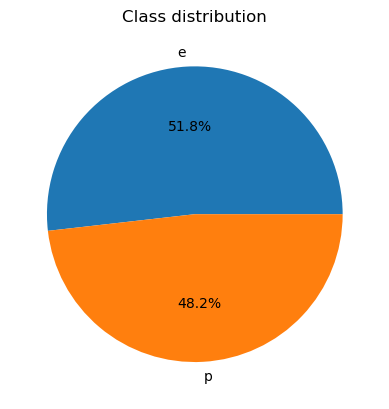

In [12]:
class_counts = df["class"].value_counts()
plt.pie(class_counts.values, labels=class_counts.index, autopct='%1.1f%%')
plt.title("Class distribution")
plt.show()

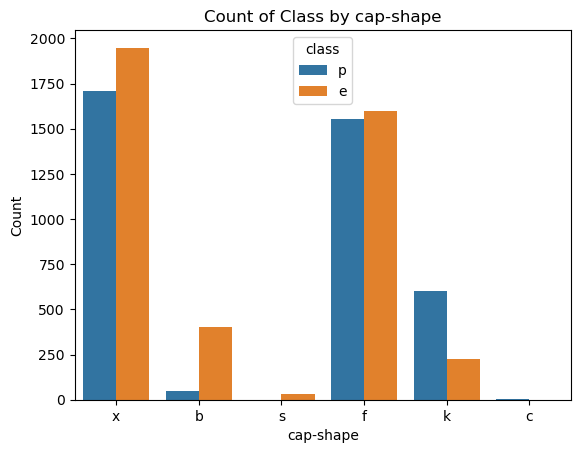

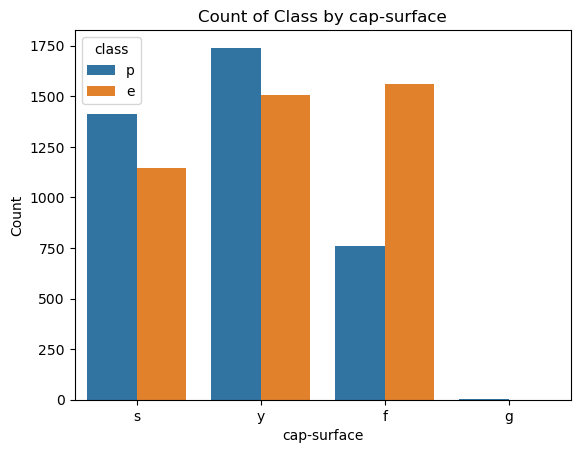

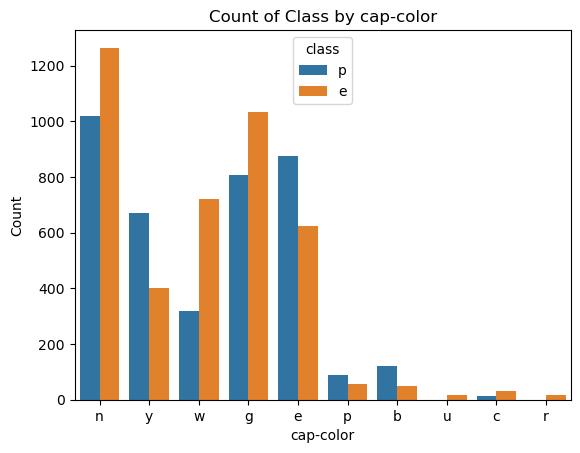

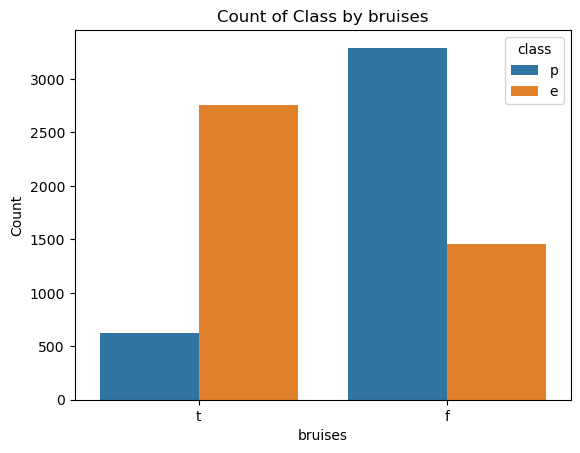

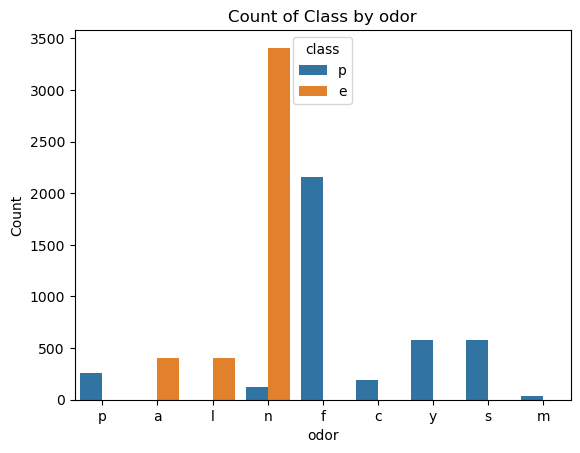

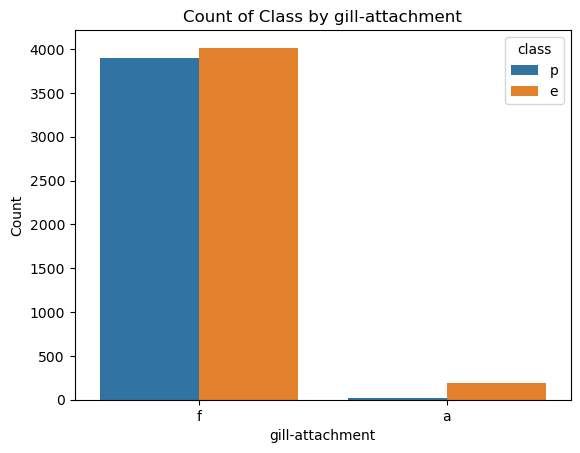

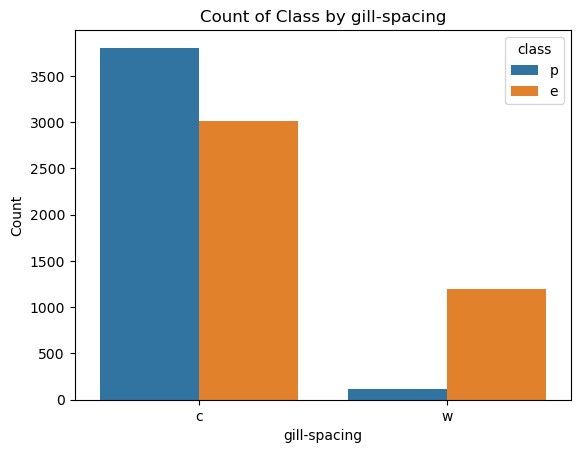

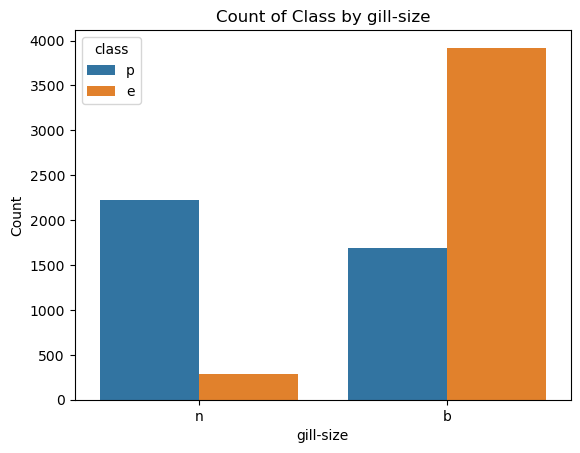

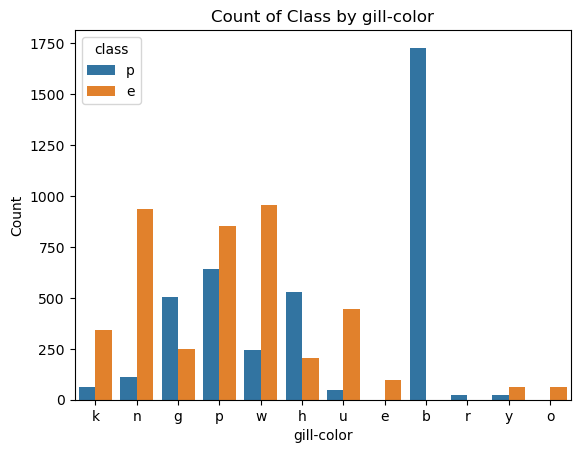

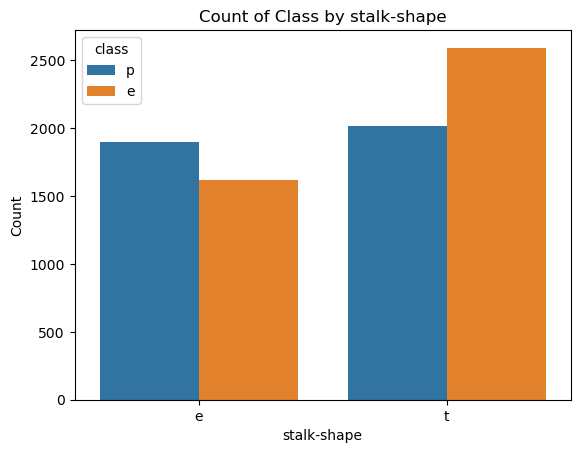

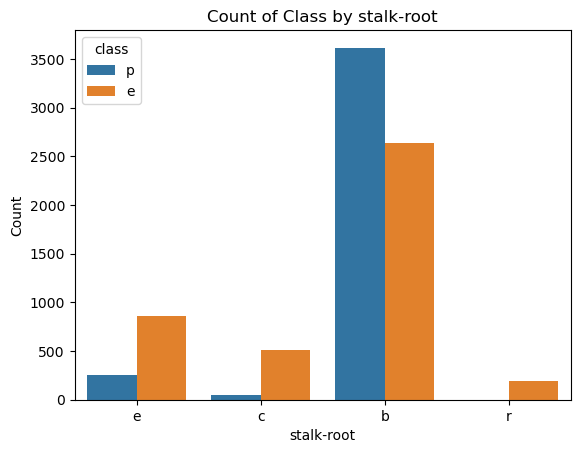

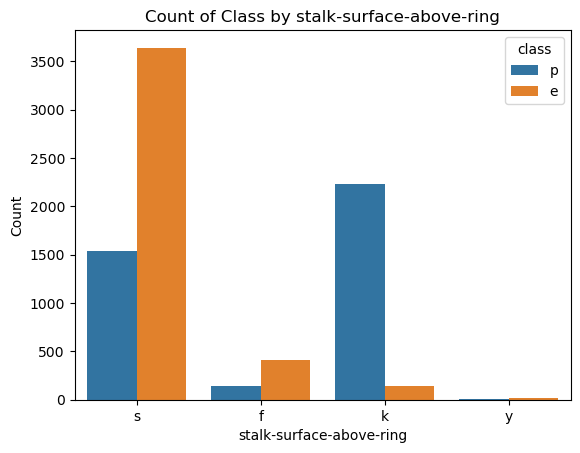

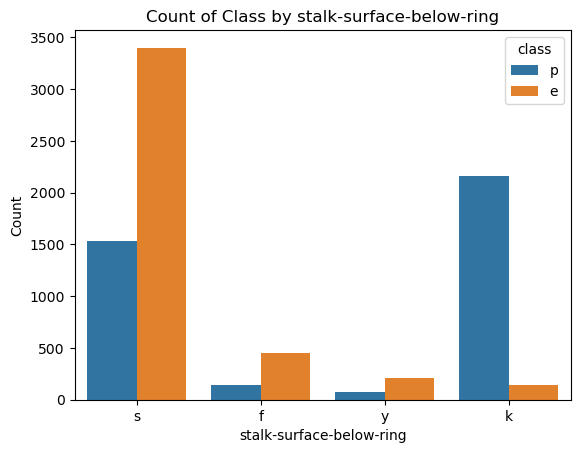

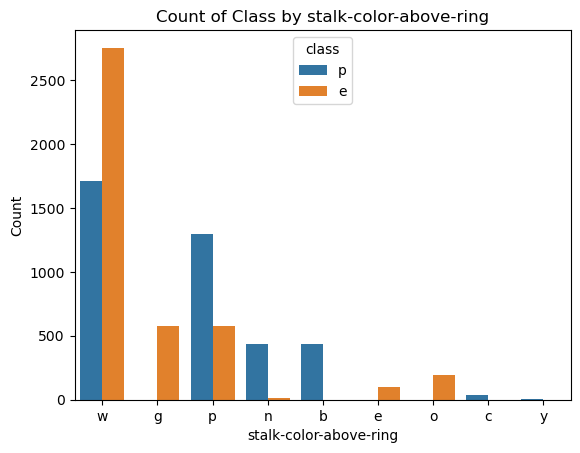

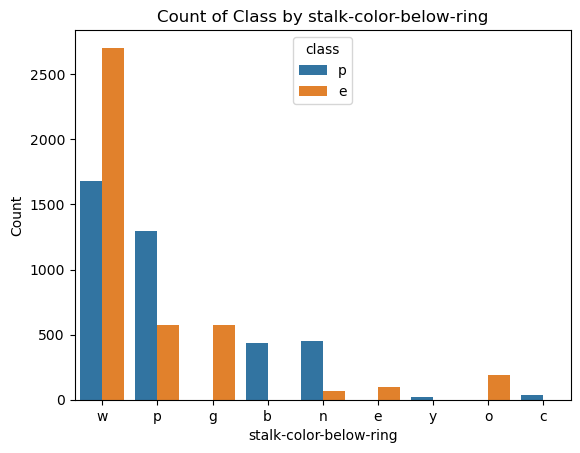

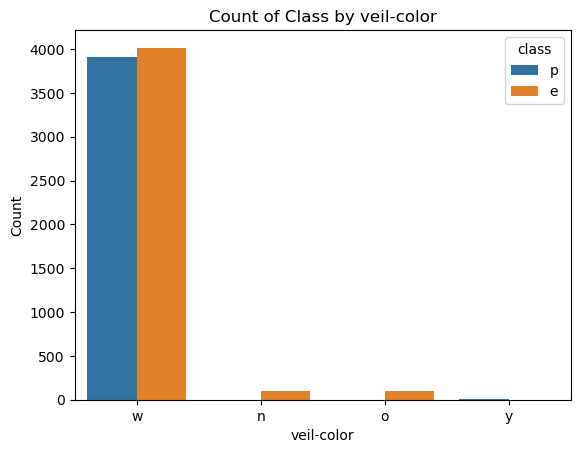

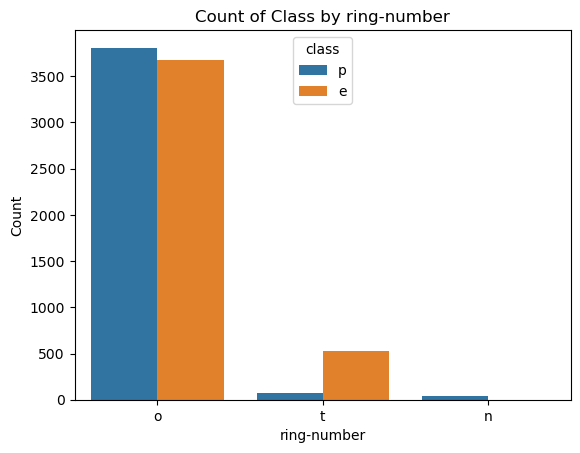

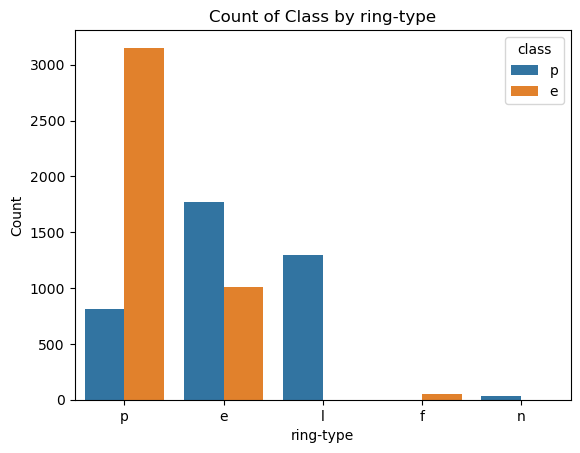

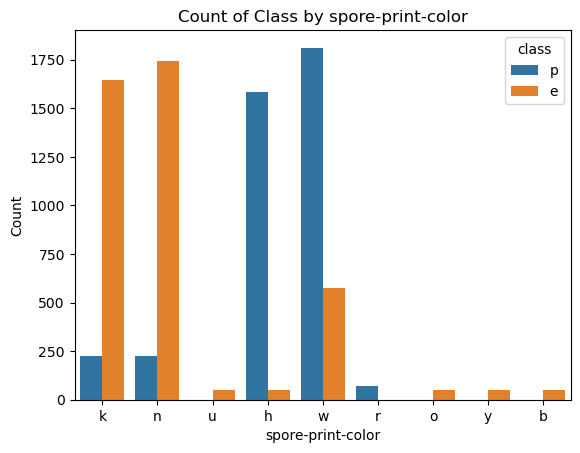

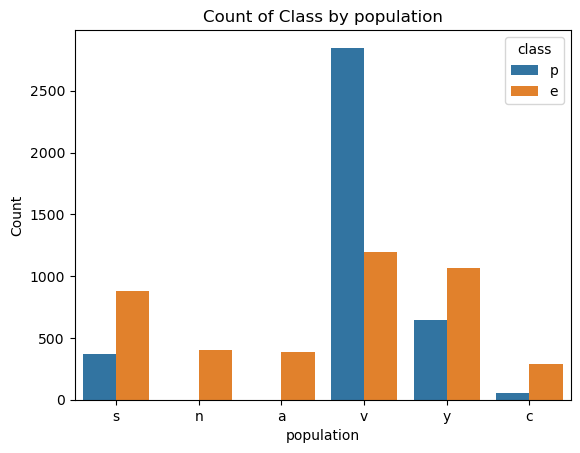

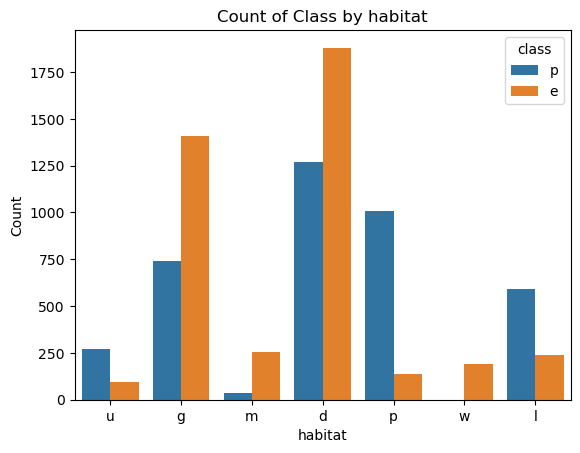

In [13]:
attributes = ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
              'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
              'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
              'stalk-surface-below-ring', 'stalk-color-above-ring',
              'stalk-color-below-ring', 'veil-color', 'ring-number',
              'ring-type', 'spore-print-color', 'population', 'habitat']

for attribute in attributes:
    sns.countplot(x=attribute, hue='class', data=df)
    plt.xlabel(attribute)
    plt.ylabel('Count')
    plt.title(F'Count of Class by {attribute}')
    plt.show()


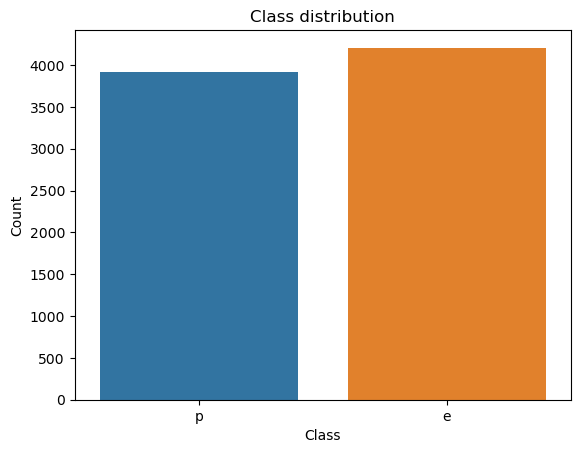

In [14]:
sns.countplot(x='class', data=df)
plt.title("Class distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

**After visualizing the class column in the mushroom classification dataset, we found that the number of edible mushrooms is greater than the number of poisonous mushrooms. Specifically, we observed that approximately 52% of the mushrooms in the dataset are classified as edible, while the remaining 48% are classified as poisonous.**

# **Feature Engineering**
## convert categorical data in numerical

In [15]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
li = LabelEncoder()
oi = OrdinalEncoder()

In [16]:
df.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]] = oi.fit_transform(df.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]])
df['class'] = li.fit_transform(df['class'])
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5.0,2.0,4.0,1.0,6.0,1.0,0.0,1.0,4.0,...,2.0,2.0,7.0,7.0,2.0,1.0,4.0,2.0,3.0,5.0
1,0,5.0,2.0,9.0,1.0,0.0,1.0,0.0,0.0,4.0,...,2.0,2.0,7.0,7.0,2.0,1.0,4.0,3.0,2.0,1.0
2,0,0.0,2.0,8.0,1.0,3.0,1.0,0.0,0.0,5.0,...,2.0,2.0,7.0,7.0,2.0,1.0,4.0,3.0,2.0,3.0
3,1,5.0,3.0,8.0,1.0,6.0,1.0,0.0,1.0,5.0,...,2.0,2.0,7.0,7.0,2.0,1.0,4.0,2.0,3.0,5.0
4,0,5.0,2.0,3.0,0.0,5.0,1.0,1.0,0.0,4.0,...,2.0,2.0,7.0,7.0,2.0,1.0,0.0,3.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3.0,2.0,4.0,0.0,5.0,0.0,0.0,0.0,11.0,...,2.0,2.0,5.0,5.0,1.0,1.0,4.0,0.0,1.0,2.0
8120,0,5.0,2.0,4.0,0.0,5.0,0.0,0.0,0.0,11.0,...,2.0,2.0,5.0,5.0,0.0,1.0,4.0,0.0,4.0,2.0
8121,0,2.0,2.0,4.0,0.0,5.0,0.0,0.0,0.0,5.0,...,2.0,2.0,5.0,5.0,1.0,1.0,4.0,0.0,1.0,2.0
8122,1,3.0,3.0,4.0,0.0,8.0,1.0,0.0,1.0,0.0,...,2.0,1.0,7.0,7.0,2.0,1.0,0.0,7.0,4.0,2.0


# **Feature Selection**

## **Chi_Scores**

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x = df.iloc[:,1:]
y = df['class']

In [19]:
test = SelectKBest(score_func=chi2,k=5)
chi = test.fit(x,y)

**We performs feature selection using the chi-squared test and outputs the top 5 features with the highest chi-squared test scores. This can help to improve the accuracy and performance of machine learning models that are trained on the dataset.**

In [20]:
chi.scores_

array([1.75083640e+01, 2.14068544e+02, 1.15113816e+01, 1.19427735e+03,
       7.59101632e+01, 3.50544682e+00, 8.26795274e+02, 1.63660683e+03,
       5.95776447e+03, 3.65941055e+01, 1.35835864e+03, 2.22982400e+02,
       2.06648180e+02, 1.19792216e+02, 1.09789410e+02, 5.12682568e+00,
       2.56463352e+01, 1.95061015e+03, 3.79132729e+02, 3.11766736e+02,
       7.51309489e+02])

In [21]:
x.columns

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [22]:
chidf = pd.DataFrame(chi.scores_).T
chidf.columns = x.columns
chidf.T

,0
cap-shape,17.508364
cap-surface,214.068544
cap-color,11.511382
bruises,1194.277352
odor,75.910163
gill-attachment,3.505447
gill-spacing,826.795274
gill-size,1636.606833
gill-color,5957.764469
stalk-shape,36.594105


# **RFE**

In [23]:
lg = LogisticRegression()

rfe = RFE(lg, n_features_to_select=5)

rfe.fit(x,y)

RFE(estimator=LogisticRegression(), n_features_to_select=5)

**This code performs feature selection using the RFE method and displays the rankings of each feature. This allows us to identify the most important features for the logistic regression model, which can then be used to train the model more effectively.**

In [24]:
rfe.ranking_

array([15,  8, 16,  2,  7,  6,  1,  1, 12, 10,  1,  1, 13, 14, 17,  1,  5,
        4,  9,  3, 11])

In [25]:
rfe.support_

array([False, False, False, False, False, False,  True,  True, False,
       False,  True,  True, False, False, False,  True, False, False,
       False, False, False])

In [26]:
rfe_df = pd.DataFrame(rfe.ranking_).T
rfe_df.columns = x.columns
rfe_df.T

,0
cap-shape,15
cap-surface,8
cap-color,16
bruises,2
odor,7
gill-attachment,6
gill-spacing,1
gill-size,1
gill-color,12
stalk-shape,10


In [27]:
# **Tree Based Approach**

In [28]:
dt = DecisionTreeClassifier(criterion='entropy')

In [29]:
dt.fit(x,y)

DecisionTreeClassifier(criterion='entropy')

In [30]:
dt_df = pd.DataFrame(dt.feature_importances_).T
dt_df.columns = x.columns
dt_df.T

,0
cap-shape,0.000000
cap-surface,0.000000
cap-color,0.000000
bruises,0.027191
odor,0.088867
gill-attachment,0.000000
gill-spacing,0.000000
gill-size,0.150039
gill-color,0.269650
stalk-shape,0.000000


##  Based on Feature Selection Common Columns

In [31]:
data1 = df[['class','bruises','gill-spacing','gill-size','gill-color','stalk-root','stalk-surface-above-ring','veil-color','ring-type','spore-print-color', 'population']]
data1

,class,bruises,gill-spacing,gill-size,gill-color,stalk-root,stalk-surface-above-ring,veil-color,ring-type,spore-print-color,population
0,1,1.0,0.0,1.0,4.0,2.0,2.0,2.0,4.0,2.0,3.0
1,0,1.0,0.0,0.0,4.0,1.0,2.0,2.0,4.0,3.0,2.0
2,0,1.0,0.0,0.0,5.0,1.0,2.0,2.0,4.0,3.0,2.0
3,1,1.0,0.0,1.0,5.0,2.0,2.0,2.0,4.0,2.0,3.0
4,0,0.0,1.0,0.0,4.0,2.0,2.0,2.0,0.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0.0,0.0,0.0,11.0,0.0,2.0,1.0,4.0,0.0,1.0
8120,0,0.0,0.0,0.0,11.0,0.0,2.0,0.0,4.0,0.0,4.0
8121,0,0.0,0.0,0.0,5.0,0.0,2.0,1.0,4.0,0.0,1.0
8122,1,0.0,0.0,1.0,0.0,0.0,2.0,2.0,0.0,7.0,4.0


## Spillting new Data

In [32]:
X=data1.drop("class",axis=1)
y=data1["class"]

In [33]:
col= X.copy()
col

,bruises,gill-spacing,gill-size,gill-color,stalk-root,stalk-surface-above-ring,veil-color,ring-type,spore-print-color,population
0,1.0,0.0,1.0,4.0,2.0,2.0,2.0,4.0,2.0,3.0
1,1.0,0.0,0.0,4.0,1.0,2.0,2.0,4.0,3.0,2.0
2,1.0,0.0,0.0,5.0,1.0,2.0,2.0,4.0,3.0,2.0
3,1.0,0.0,1.0,5.0,2.0,2.0,2.0,4.0,2.0,3.0
4,0.0,1.0,0.0,4.0,2.0,2.0,2.0,0.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...
8119,0.0,0.0,0.0,11.0,0.0,2.0,1.0,4.0,0.0,1.0
8120,0.0,0.0,0.0,11.0,0.0,2.0,0.0,4.0,0.0,4.0
8121,0.0,0.0,0.0,5.0,0.0,2.0,1.0,4.0,0.0,1.0
8122,0.0,0.0,1.0,0.0,0.0,2.0,2.0,0.0,7.0,4.0


In [34]:
col.columns.tolist()


['bruises',
 'gill-spacing',
 'gill-size',
 'gill-color',
 'stalk-root',
 'stalk-surface-above-ring',
 'veil-color',
 'ring-type',
 'spore-print-color',
 'population']

In [35]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.20, random_state=42)

# **Model Building**

In [36]:
import pickle
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay

# Define the models to be evaluated
model = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Support Vector Machine': SVC(),
    "GaussianNB":GaussianNB()
}

name_=[]
score_=[]
accuracy_=[]
for name, mod in model.items():
    model_fit = mod.fit(col, y)
    name_.append(name)
    score_.append(model_fit.score(col, y))
    y_pred = model_fit.predict(col)
    accuracy_.append(accuracy_score(y_pred, y))
    print(confusion_matrix(y_pred, y))
pd.DataFrame({"NAME":name_,"SCORE":score_,"ACCURACY":accuracy_})

[[4058  254]
 [ 150 3662]]
[[4208    0]
 [   0 3916]]
[[4208    0]
 [   0 3916]]
[[4208    0]
 [   0 3916]]
[[4048  580]
 [ 160 3336]]
[[4144  216]
 [  64 3700]]
[[4048  580]
 [ 160 3336]]


,NAME,SCORE,ACCURACY
0,Logistic Regression,0.950271,0.950271
1,Decision Tree,1.000000,1.000000
2,Random Forest,1.000000,1.000000
3,KNN,1.000000,1.000000
4,Naive Bayes,0.908912,0.908912
5,Support Vector Machine,0.965534,0.965534
6,GaussianNB,0.908912,0.908912


score 1.0
1.0
[[4208    0]
 [   0 3916]]


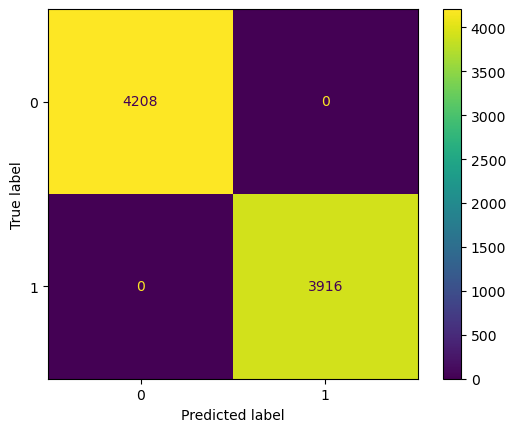

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

param = {"n_estimators": [50, 100, 150], "max_depth": [10, 20, 30], "max_features": ["sqrt", "log2"]}
grid = GridSearchCV(RandomForestClassifier(), param, cv=2)
grid_fit = grid.fit(col, y)
print("score", grid_fit.score(col, y))
y_pred = grid_fit.predict(col)
print(accuracy_score(y_pred, y))
print(confusion_matrix(y_pred, y))
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_pred, y)).plot()

In [41]:
pickle.dump(df,open('df.pkl','wb'))

mod = ['bruises','gill-spacing',
       'gill-size', 'gill-color','stalk-root',
       'stalk-surface-above-ring','veil-color',
       'ring-type', 'spore-print-color', 'population']

In [42]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
for i in mod:
    print(i)
    print(df[i].unique())
    print(pd.Series(LabelEncoder().fit_transform(df[i])).unique())

bruises
[1.0 0.0]
[1 0]
gill-spacing
[0.0 1.0]
[0 1]
gill-size
[1.0 0.0]
[1 0]
gill-color
[4.0 5.0 2.0 7.0 10.0 3.0 9.0 1.0 0.0 8.0 11.0 6.0]
[ 4  5  2  7 10  3  9  1  0  8 11  6]
stalk-root
[2.0 1.0 0.0 3.0]
[2 1 0 3]
stalk-surface-above-ring
[2.0 0.0 1.0 3.0]
[2 0 1 3]
veil-color
[2.0 0.0 1.0 3.0]
[2 0 1 3]
ring-type
[4.0 0.0 2.0 1.0 3.0]
[4 0 2 1 3]
spore-print-color
[2.0 3.0 6.0 1.0 7.0 5.0 4.0 8.0 0.0]
[2 3 6 1 7 5 4 8 0]
population
[3.0 2.0 0.0 4.0 5.0 1.0]
[3 2 0 4 5 1]


In [43]:
y

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int32